# Regression Implementation

Using the auto-mpg dataset
The regression task is to predict an output with continuous values.
Implement four methods for each task:
1. linear regression
2. Support vector machines
3. Decision trees
4. multi-layer perception neural network

### After the model
Apply K-fold cross validation, to evaluate each method
Use mean squared error for regression

# Classification implementation

Using the iris dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
autompg_ds = pd.read_csv('Datasets/auto-mpg.csv', names=['mpg',
                                                   'cylinders',
                                                   'displacement',
                                                   'horsepower',
                                                   'weight',
                                                   'acceleration',
                                                   'model year',
                                                   'origin',
                                                   'car name'], index_col=False)

In [3]:
autompg_ds

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [4]:
# Drop 
autompg_ds = autompg_ds.dropna()

In [5]:
autompg_ds

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


## Feature selection of dataframe

In [6]:
autompg_ds
autompg_ds.drop('model year', axis=1, inplace=True)

/Users/callumedwards/opt/anaconda3/envs/mle_tf/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [7]:
# drop categorical values from the table
autompg_ds.drop("car name", axis=1, inplace=True)

In [8]:
autompg_ds

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin
0,18.0,8,307.0,130.0,3504,12.0,1
1,15.0,8,350.0,165.0,3693,11.5,1
2,18.0,8,318.0,150.0,3436,11.0,1
3,16.0,8,304.0,150.0,3433,12.0,1
4,17.0,8,302.0,140.0,3449,10.5,1
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,1
394,44.0,4,97.0,52.0,2130,24.6,2
395,32.0,4,135.0,84.0,2295,11.6,1
396,28.0,4,120.0,79.0,2625,18.6,1


In [9]:
autompg_ds.drop("origin", axis=1, inplace=True)

/Users/callumedwards/opt/anaconda3/envs/mle_tf/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [10]:
autompg_ds

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130.0,3504,12.0
1,15.0,8,350.0,165.0,3693,11.5
2,18.0,8,318.0,150.0,3436,11.0
3,16.0,8,304.0,150.0,3433,12.0
4,17.0,8,302.0,140.0,3449,10.5
...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6
394,44.0,4,97.0,52.0,2130,24.6
395,32.0,4,135.0,84.0,2295,11.6
396,28.0,4,120.0,79.0,2625,18.6


### Demonstrate a boxplot for all features and find any anomalies between each feature

mpg                AxesSubplot(0.125,0.798085;0.168478x0.0819149)
cylinders       AxesSubplot(0.327174,0.798085;0.168478x0.0819149)
displacement    AxesSubplot(0.529348,0.798085;0.168478x0.0819149)
horsepower      AxesSubplot(0.731522,0.798085;0.168478x0.0819149)
weight             AxesSubplot(0.125,0.699787;0.168478x0.0819149)
acceleration    AxesSubplot(0.327174,0.699787;0.168478x0.0819149)
dtype: object

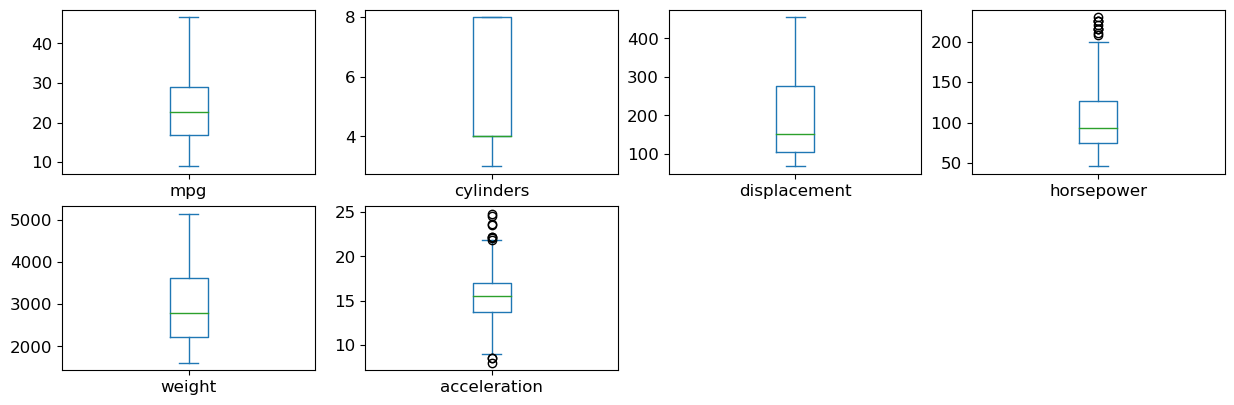

In [11]:
mpg_mean = autompg_ds.iloc[:,:]
mpg_mean.plot(kind='box', subplots=True, layout=(8,4), sharex=True,
              sharey=False, fontsize=12, figsize=(15,20))

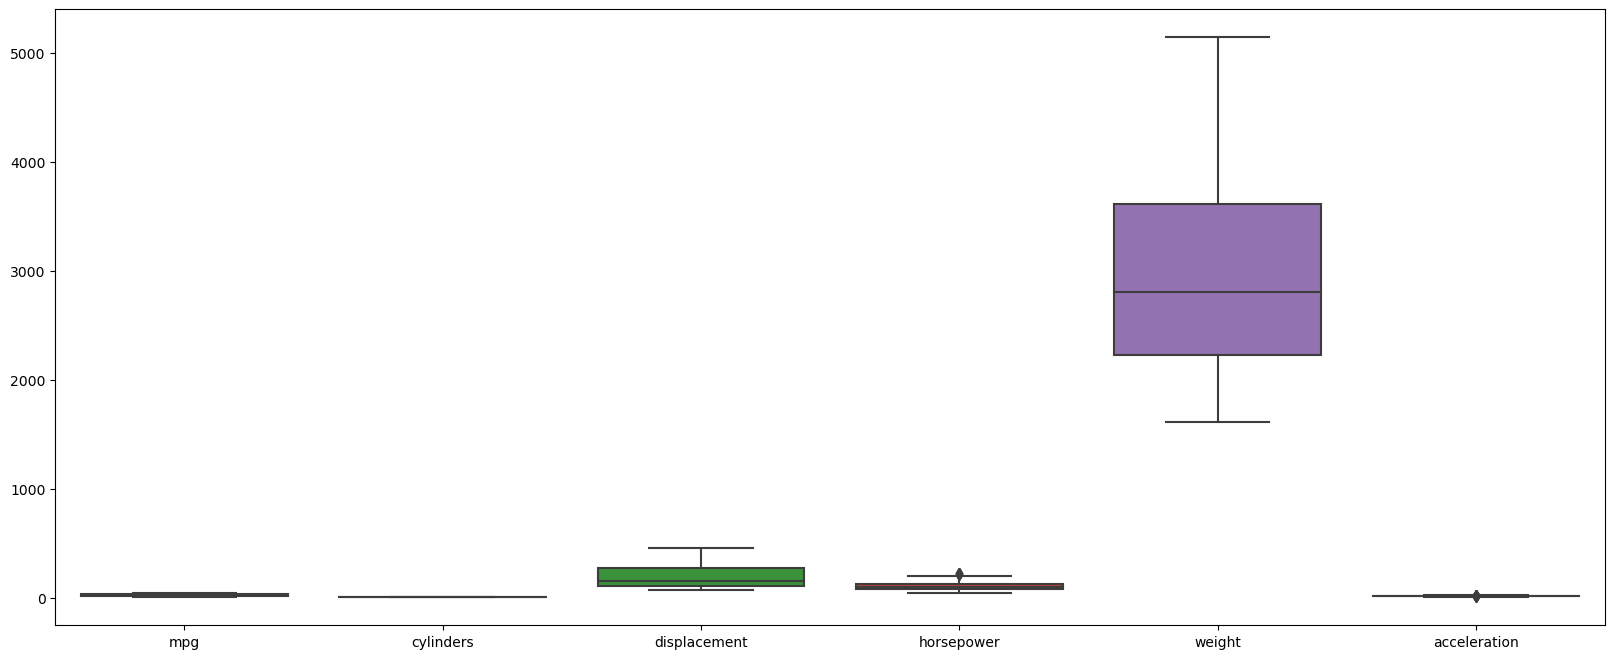

In [12]:
#Another look at some of the data

fig,ax = plt.subplots(1, figsize=(20,8))
sns.boxplot(data=autompg_ds.iloc[:, :], ax=ax)

97.0     21
350.0    18
98.0     17
318.0    17
250.0    17
         ..
104.0     1
110.0     1
130.0     1
111.0     1
144.0     1
Name: displacement, Length: 81, dtype: int64

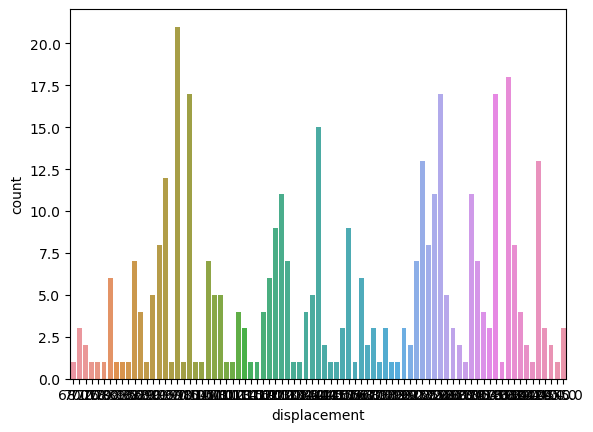

In [13]:
# Displacement and weight have the largest margins and data
sns.countplot(x='displacement', data=autompg_ds)
autompg_ds['displacement'].value_counts()

## Insert computation matrix

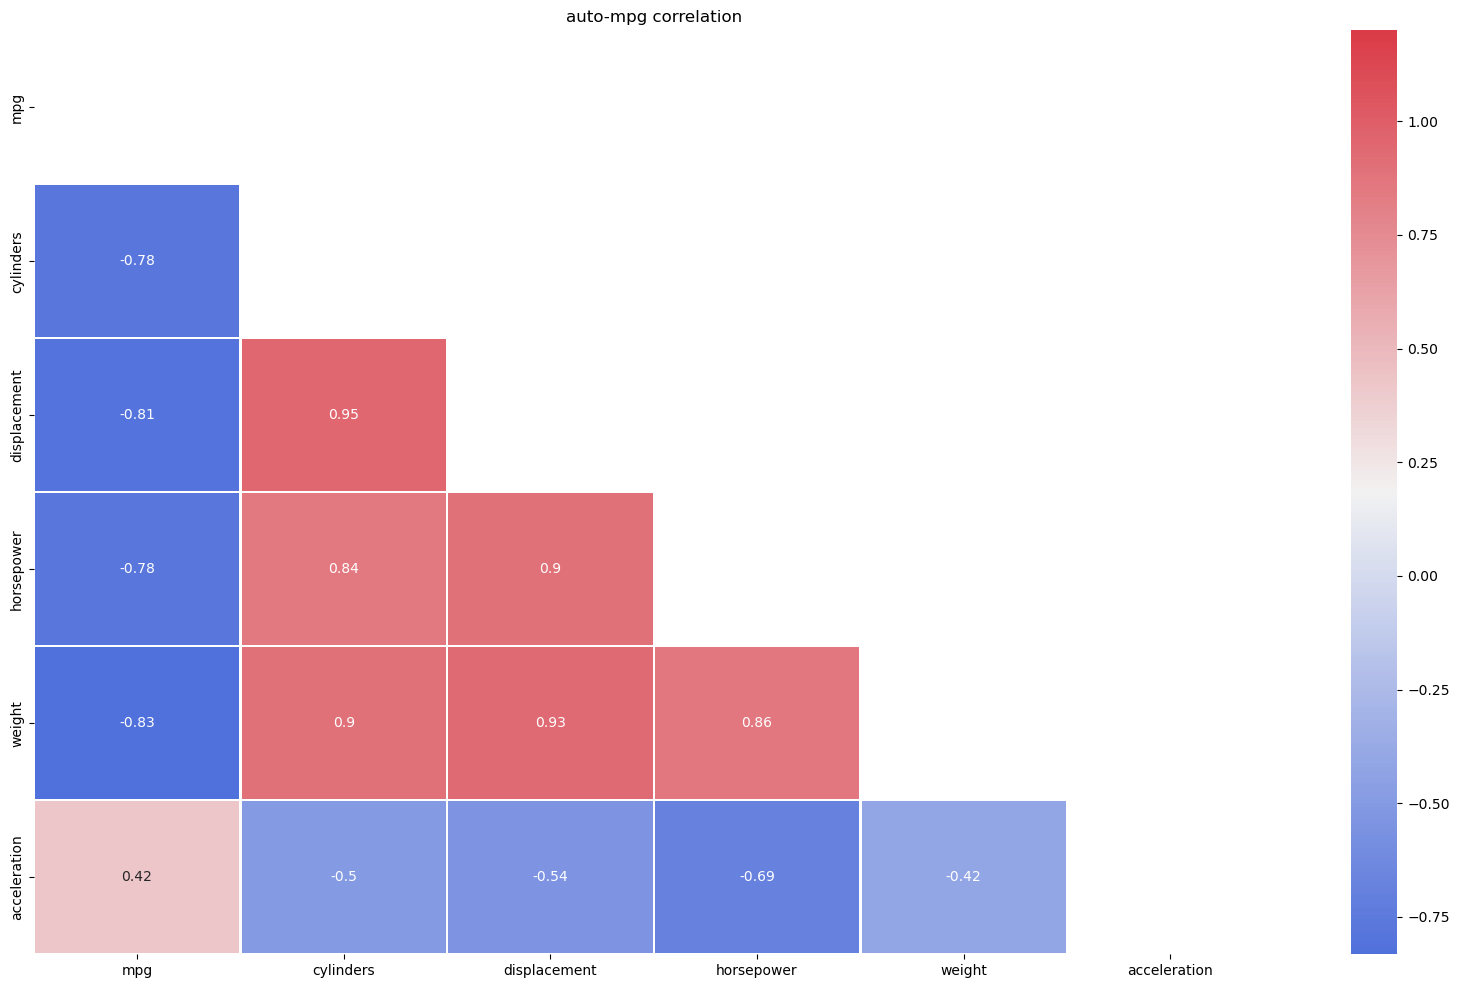

In [14]:
corrMatt = autompg_ds.corr()

# Generate a mask for the upper triangle 
mask = np.zeros_like(corrMatt) 
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 12)) 
plt.title('auto-mpg correlation')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio 
sns.heatmap(corrMatt, vmax=1.2, square=False, cmap=cmap, mask=mask, ax=ax, annot=True, fmt='.2g', linewidths=1);

## Since this is a regression task, look at the mean of each feature and locate the best correlation

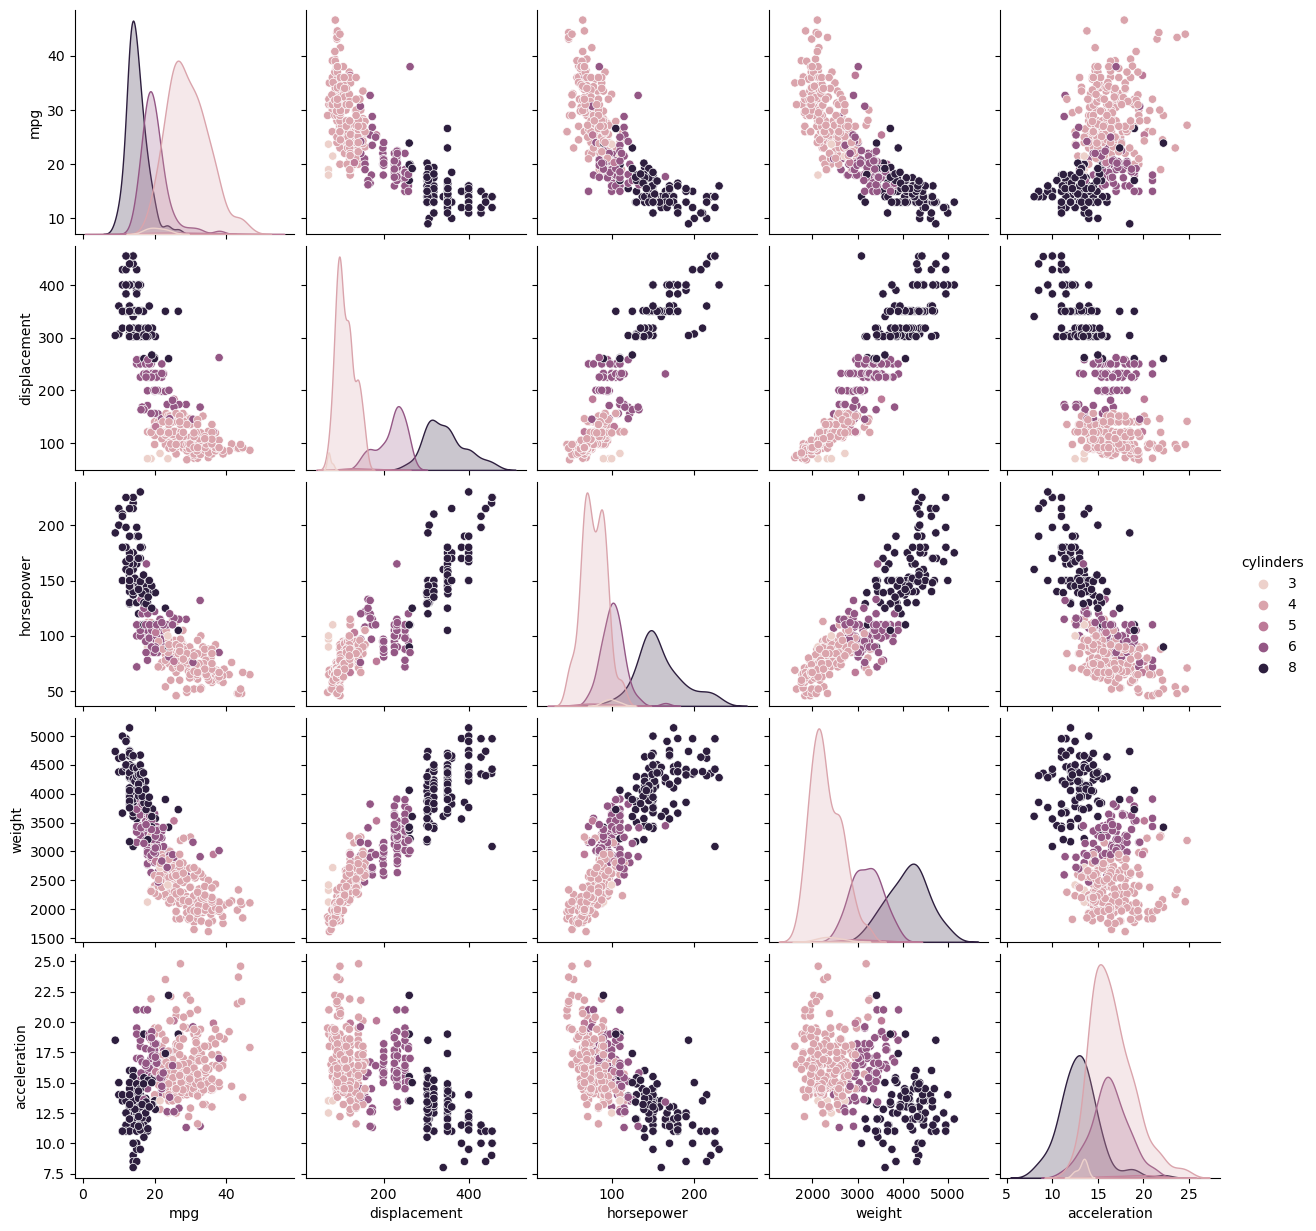

In [15]:
# Do for all features except the last two (car name, origin) 
# Try first 7 features
autompg_ds["cylinders"].value_counts()
sns.pairplot(autompg_ds[list(autompg_ds.columns[:8])], hue="cylinders")

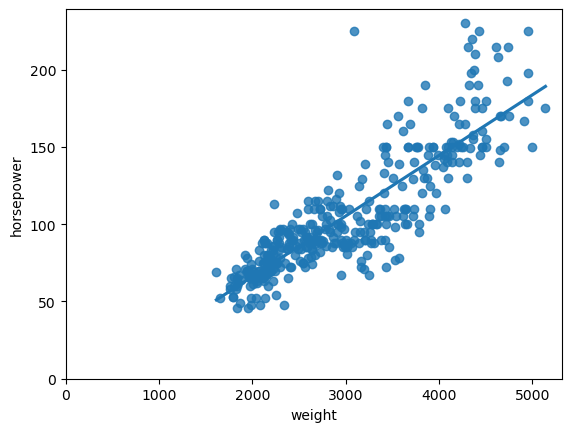

In [16]:
# plot line of best fit
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(data=autompg_ds, x="weight", y="horsepower", ci=None)
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.show()

### Features displacement, weight and acceleration looks like the best correlation 

In [17]:
# Normalise the features
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
Xs = scaler.fit_transform(autompg_ds) 

# Predicting model using linear regression


In [18]:
# Convert into testing and training data
# Decide features for model 
# weight, horsepower

from sklearn.model_selection import train_test_split

xs = autompg_ds["displacement"]
ys = autompg_ds["mpg"]

Xs_train, Xs_test, y_train, y_test = train_test_split(xs, ys, test_size=0.3, random_state=20)

In [19]:
# reshape the training and testing sets
x1 = np.array(Xs_train).reshape((-1,1))
y1 = np.array(y_train)
x_test = np.array(Xs_test).reshape((-1,1))
y_test = np.array(y_test)

In [20]:
# import linear regression from sklearn 
# Create linear regression model and fit it
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x1,y1)

LinearRegression()

In [21]:
# Test the score of the model with R2 
r_sq = linear_model.score(x1,y1)
print(f"Coefficient of determination: {r_sq}")
print(f"y intercept: {linear_model.intercept_}")
print(f"slope: {linear_model.coef_}")

Coefficient of determination: 0.6348619864390659
y intercept: 35.10609851853505
slope: [-0.06096617]


In [22]:
# Predict model for y_pred
y_2 = linear_model.predict(x1)
y_2

array([28.582718  , 13.76793796, 21.38870959, 13.76793796, 16.69431426,
       29.55817677, 29.19237974, 25.59537553, 26.87566516, 27.18049603,
       20.96194638, 15.7188555 , 25.59537553, 29.13141356, 26.57083429,
       27.72919158, 27.79015776, 29.19237974,  8.28098239, 27.72919158,
       19.37682588, 10.71962931, 29.55817677, 29.86300764, 27.72919158,
       25.6563417 , 27.85112393, 10.71962931, 15.7188555 , 21.38870959,
       27.85112393, 29.61914295, 16.69431426, 28.582718  , 23.03479626,
        8.95161029, 23.03479626, 27.66822541, 13.70697179, 29.19237974,
       27.66822541, 15.7188555 , 23.94928885, 19.86455526, 29.19237974,
       19.86455526, 16.69431426, 26.57083429, 29.13141356, 29.19237974,
       21.38870959, 28.09498862, 28.70465035, 25.90020639, 29.55817677,
       29.61914295, 21.38870959, 25.59537553, 29.19237974, 29.68010912,
       29.19237974, 15.7188555 , 21.38870959, 30.28977085, 29.13141356,
       29.13141356, 13.76793796, 19.37682588, 13.15827623, 27.72

In [23]:
# Calculate mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y1, y_2)
print(mse)

21.906052370659175


In [25]:
# Cross validation score and KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

cv = KFold(n_splits=3, random_state=None, shuffle=False)
model = LinearRegression().fit(x1,y1)

number_of_folds = 5

score_cv = cross_val_score(model, x1, y1, cv=cv)
cv_error = np.average(cross_val_score(model, x1, y1, cv=cv))
print('Cross validation score across {}-folds are: {}'.format(cv.get_n_splits(), score_cv))
print('The {}-fold cross-validation average accuracy score for this classifier is {:.4f}'.format(number_of_folds, cv_error))

Cross validation score across 3-folds are: [0.64050563 0.6801843  0.55785034]
The 5-fold cross-validation average accuracy score for this classifier is 0.6262


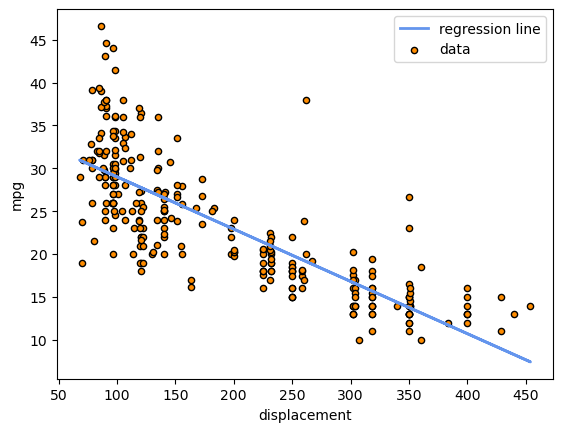

In [26]:
plt.figure()
plt.scatter(x1, y1, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(x1, y_2, color="cornflowerblue", label="regression line", linewidth=2)
plt.xlabel("displacement")
plt.ylabel("mpg")
plt.legend()
plt.show()

# SVM

In [27]:
from sklearn import svm
from sklearn import metrics
# define and fit the SVM model 

clf = svm.SVR(kernel="linear")
clf.fit(x1,y1)

SVR(kernel='linear')

In [28]:
# determine the overall accuracy of the model (R2)
clf.score(x1, y1)

0.6286809977172508

In [29]:
# mean squared error 
# predict values using the model and testing variables

y_pred = clf.predict(x_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

21.473761931470737

In [30]:
# Cross validation score and K-fold
cv = KFold(n_splits=5, random_state=None, shuffle=False)
model = svm.SVR(kernel="linear")

cvs = cross_val_score(model, x1, y1, cv=cv)
avg_score = np.average(cross_val_score(clf, x1, y1, cv=cv))

print('Cross validation score across {}-folds are: {}'.format(cv.get_n_splits(), cvs))
print('The {}-fold cross-validation average accuracy score for this classifier is {:.4f}'.format(cv.get_n_splits(), avg_score))

Cross validation score across 5-folds are: [0.59198308 0.73104465 0.67859753 0.63050434 0.49280879]
The 5-fold cross-validation average accuracy score for this classifier is 0.6250


# Multi-layer Perceptron (ANN)

In [31]:
from sklearn.neural_network import MLPRegressor
"""
Model:
Using stochastic gradient decent as the solver
linear activation function
4 hidden layers with 100 neurons each
"""

# train model
clf = MLPRegressor(solver='lbfgs',
                   activation="tanh",
                   alpha=1e-5,
                   hidden_layer_sizes=(50, 4),
                   random_state=20)
clf.fit(x1,y1)

/Users/callumedwards/opt/anaconda3/envs/mle_tf/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(activation='tanh', alpha=1e-05, hidden_layer_sizes=(50, 4),
             random_state=20, solver='lbfgs')

In [32]:
# determine score for fit
clf.score(x1,y1)

0.6981473385289371

In [33]:
# mean squared error
# predict y-values from the model

y_3 = clf.predict(x_test)
mean_squared_error(y_test, y_3)

14.322052429504904

In [34]:
# Cross validation score
# using a 5 fold split
clf = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 4), random_state=20)
clf.fit(x1,y1)
cv = KFold(n_splits=5, random_state=None, shuffle=False)

cvs = cross_val_score(clf, x1, y1, cv=cv)
avg = np.average(cross_val_score(clf, x1, y1, cv=cv))

print('Cross validation score across {}-folds are: {}'.format(cv.get_n_splits(), cvs))
print('The {}-fold cross-validation average accuracy score for this classifier is {:.2f}'.format(cv.get_n_splits(), avg))

Cross validation score across 5-folds are: [0.59651138 0.72904528 0.67240221 0.65812892 0.49736492]
The 5-fold cross-validation average accuracy score for this classifier is 0.63
